In [755]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zb-da5-competition/BankChurners_.csv


In [756]:
#Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')


BASIC EDA
---

기본적인 데이터전처리


In [757]:
import pandas as pd
df = pd.read_csv('/kaggle/input/zb-da5-competition/BankChurners_.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [758]:
print('df.shape :', df.shape)

df.shape : (10127, 21)


In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [760]:
# no unusual data noted
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [761]:
#check for duplicated data -none noted
df.duplicated().value_counts()

False    10127
Name: count, dtype: int64

In [762]:
#Checking Attrition rate
df.Attrition_Flag.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [763]:
#Attrition rate - around 16%
round(1627 / (1627+8500) * 100, 2)

16.07

In [764]:
df.drop('CLIENTNUM', axis=1, inplace=True)

DATA Visualization 
---
Categorial data

In [765]:
#seperate categorical / numerical data set
categorical_list = []
numerical_list = []

for i in df.columns:
    if df[i].dtype == 'O':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
        
print(categorical_list)
print(numerical_list)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [766]:
categorical_list

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

Categorical data - Modification
---

- Category data중 Marital Status에 Single과 Divorced가 있는데 Matrical_status는 single인지 아닌지가 더 중요하다고 판단 둘을 한 그룹에 넣는것으로 변환
- Card_Category, Silver, Gold, Platinum에 숫자가 얼마 안됨으로 Silver etc로 통합하는것이 좋다고 판단되어짐
- Income_category, Income은 제일 중요한 변수중 하나로 판단되어지는데 unknown인 변수는 필요가 없음으로 제거? (Maybe)

In [767]:
df.Marital_Status.value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [768]:
#Categorical data 시각화
# i = 1
# plt.figure(figsize=(15, 15))
# for col in categorical_list:
#     plt.subplot(3, 2, i)
#     sns.countplot(data=df, x=col, hue='Attrition_Flag')
#     i += 1

# plt.tight_layout()
# plt.show()

In [769]:
#rename divorced to single
df['Marital_Status'] = df['Marital_Status'].replace('Divorced', 'Single')
df['Marital_Status'].value_counts()

Marital_Status
Single     4691
Married    4687
Unknown     749
Name: count, dtype: int64

In [770]:
df['Card_Category'] = df['Card_Category'].replace(['Silver', 'Gold', 'Platinum'], 'Silver_group')
df['Card_Category'].value_counts()

Card_Category
Blue            9436
Silver_group     691
Name: count, dtype: int64

Analysis 
---

- 여성의 이탈율 남성에 비해 좀더 높음
- Graduate의 수가 가장 많지만 College graduated의 이탈율이 제일 높음
- 40K 이하의 income을 버는 사람들이 가장 많지만 120K 의 이탈율이 가장 많음
- 블루카드의 사용자수가 압도적으로 많으며 이탈자도 제일 많음


In [771]:
numerical_list

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [772]:
#Numerical Data 시각화 
# import warnings
# warnings.filterwarnings('ignore')

# i = 1
# plt.figure(figsize=(15, 15))

# for col in numerical_list:
#     plt.subplot(8, 2, i)
#     sns.histplot(data=df, x=col, hue='Attrition_Flag', kde=True) 
#     i += 1

# plt.tight_layout()
# plt.show();

#Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1, 약간의 Outlier가 있는것 같음

In [773]:
#Potential outlier - will take a look at this later
len(df[df['Total_Amt_Chng_Q4_Q1'] > 1.5]), len(df[df['Total_Amt_Chng_Q4_Q1'] > 2.0])

(109, 20)

In [774]:
#Potential outlier - will take a look at this later
len(df[df['Total_Ct_Chng_Q4_Q1'] > 1.5]), len(df[df['Total_Ct_Chng_Q4_Q1'] > 2.0])

(81, 26)

Numerical data - analysis
---

- 40 ~ 50 대 client들이 가장 많으며 이탈율도 가장 높다
- 자녀가 2-3명있는 고객들이 가장 많으며 그들의 이탈율도 가장 높다
- 36개월정도를 유지한 고객이 가장 많으며 이탈율도 높다 무슨 프로모션 같은게 있었을 것
- 카드 가입율도 떨어지고 있는것으로 보임
- 3개 상품 가입한 사람이 가장 많으며 이탈율도 , 상품이 많을 수록 4개이상 갈수록 이탈율 적어짐
- 3달정도 안쓴사람이 가장많으며 이탈율이 높음 많이 사용할 수록 이탈율 적어짐
- 연락을 많이 한 사람일수록 이탈율 높아짐
- 신용한도가 낮을 수록 이탈율 높음

In [775]:
#dummie를 이용하여 상관관계 파악
#Credit_Limit과 Avg_Open_To_Buy 다중공선성 발생, 
# df_dummies = pd.get_dummies(df)

# plt.figure(figsize=(10,10))
# sns.heatmap(data = df_dummies.corr(), annot=True, cmap='coolwarm', fmt ="0.1f", annot_kws={"size": 6})

In [776]:
#다중공선성 noted 
df = df.drop('Avg_Open_To_Buy', axis = 1)

In [777]:
#위험군 나누기 - definition (High Debt-to-Income Ratio), income이 카테고리로만 나와있기 때문에 credit limit을 
#income 대신 사용하도록 하겠음

df1 = df.copy()
df1['risk_ratio'] = df1['Total_Revolving_Bal'] / df1['Credit_Limit']
df1['risk_ratio'].sort_values(ascending=False).head()

4443    0.998768
7649    0.994632
1452    0.993932
7955    0.992274
1999    0.990291
Name: risk_ratio, dtype: float64

In [778]:
#debt to credit risk ratio가 70%가 넘는 비율이 1062명 정도, 따라서 상위 0.7 이 넘는 고객들을 고위험군으로 분류
len(df1[df1['risk_ratio'] >= 0.7])

1062

In [779]:
#debt to credit risk ratio가 0인 비율 (Revolving = 0) 2470명 정도, 연체하지 않은 고객들을 저위험군으로 분류
len(df1[df1['risk_ratio'] == 0])

2470

In [780]:
df1['risk_category'] = np.where(df1['risk_ratio'] >= 0.5, 'high_risk',
                        np.where(df1['risk_ratio'] == 0, 'low_risk', 'medium_risk'))

In [781]:
df1['risk_category'].value_counts().sort_values(ascending=False)

risk_category
medium_risk    5107
high_risk      2550
low_risk       2470
Name: count, dtype: int64

In [782]:
high = df1[df1['risk_category'] == 'high_risk']
high.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,risk_ratio,risk_category
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,1.405,1171,20,2.333,0.760,0.759734,high_risk
18,Existing Customer,61,M,1,High School,Married,$40K - $60K,Blue,56,2,...,3,3193.0,2517,1.831,1336,30,1.143,0.788,0.788287,high_risk
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,...,2,2492.0,1560,0.573,1126,23,0.353,0.626,0.626003,high_risk
30,Existing Customer,53,M,3,Unknown,Married,$80K - $120K,Blue,33,3,...,3,2753.0,1811,0.977,1038,25,2.571,0.658,0.657828,high_risk
31,Existing Customer,53,M,2,Uneducated,Married,$60K - $80K,Blue,48,2,...,1,2451.0,1690,1.323,1596,26,1.600,0.690,0.689514,high_risk


In [783]:
high['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    2322
Attrited Customer     228
Name: count, dtype: int64

In [784]:
137  / (137 + 925) * 100

12.900188323917137

After Feedback
- 'Total_Trans_Ct' & 'Total_Trans_Amt' - 의미 없는 변수, feature importance에 탑3에 자주걸림 제거 필요
 

In [785]:
df = df.drop(['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'], axis=1)

In [786]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Utilization_Ratio'],
      dtype='object')

모델링의 순서
1. 빈껍데기 만들고
2. fit시키고 (학습)
3. 예측 자기자신(train data) 예측결과(test data) 계산한후
4. train data와 test data의성능평가를 한다


In [787]:
#Decision Tree 이용하여 classification 실행, libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [788]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition_Flag', axis = 1)
y = df['Attrition_Flag']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)



In [789]:
X.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [790]:
categorical_list.remove('Attrition_Flag')

In [791]:
#LabelEncoding
#Data Labeling
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
    
x_train[categorical_list].head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
415,1,4,0,2,0
3749,0,3,1,5,0
9295,1,0,2,3,1
8290,0,6,0,4,0
7672,0,3,1,4,0


In [792]:
#빈껍데기
clf = DecisionTreeClassifier(random_state=42)
#학습
clf.fit(x_train, y_train)
#예측
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

#결과
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

#과적합 발생 Confusion Maxtric를 그려보자

                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00      1131
Existing Customer       1.00      1.00      1.00      5957

         accuracy                           1.00      7088
        macro avg       1.00      1.00      1.00      7088
     weighted avg       1.00      1.00      1.00      7088

                   precision    recall  f1-score   support

Attrited Customer       0.40      0.42      0.41       496
Existing Customer       0.89      0.88      0.88      2543

         accuracy                           0.80      3039
        macro avg       0.64      0.65      0.65      3039
     weighted avg       0.81      0.80      0.81      3039



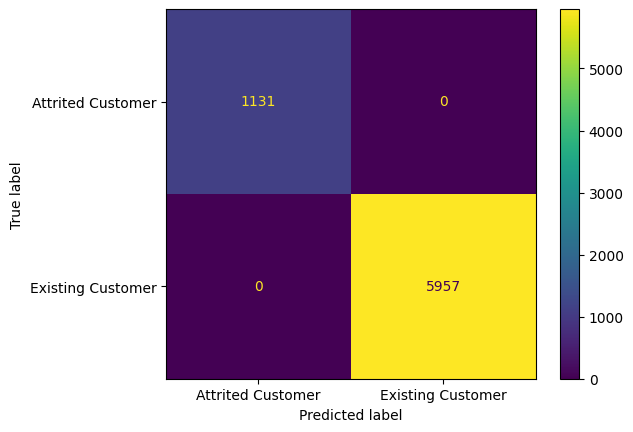

In [793]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred_train, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot()
plt.show()

In [794]:
#Plot a decision tree
# from sklearn.tree import plot_tree

# plt.figure(figsize=(40, 20), dpi = 100)

# plot_tree(clf, filled=True, rounded=True, class_names = ['Attrited Customer', 'Existing Customter'],
#         feature_names = X.columns, fontsize=12)
# plt.show()

#too complicated, need to do some pruning

In [795]:
# determine values for alpha
path = clf.cost_complexity_pruning_path(x_train, y_train) 

#chcek the path
# print(path)

#Extract different values for alpha
ccp_alphas = path.ccp_alphas

#exclude the maximum value for alpha
ccp_alphas = ccp_alphas[:-1]

#Create an array that we will put decision tress into
clf_dts = []

#now create one decision tree per values for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train, y_train)
    clf_dts.append(clf_dt)

In [796]:
# train_scores = [clf_dt.score(x_train, y_train) for clf_dt in clf_dts]
# test_scores = [clf_dt.score(x_test, y_test) for clf_dt in clf_dts]

# fig, ax = plt.subplots()
# ax.set_xlabel('alpha')
# ax.set_ylabel('accuracy')
# ax.set_title('Accurcy vs alpha for train and test sets')
# ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
# ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
# ax.legend()
# plt.show()

In [797]:
#conclusion - using cost complexity pruning 0.0050 appears to be reasonable alpha 
ccp_alpha = 0.0015

In [798]:
#create a tree with ccp_alpha = 0.005

#빈껍데기
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0015)
#학습
clf_dt.fit(x_train, y_train)
#예측
y_pred_train = clf_dt.predict(x_train)
y_pred_test = clf_dt.predict(x_test)

#결과
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

#정확도 확 떨어짐

                   precision    recall  f1-score   support

Attrited Customer       0.83      0.17      0.29      1131
Existing Customer       0.86      0.99      0.92      5957

         accuracy                           0.86      7088
        macro avg       0.85      0.58      0.60      7088
     weighted avg       0.86      0.86      0.82      7088

                   precision    recall  f1-score   support

Attrited Customer       0.81      0.16      0.27       496
Existing Customer       0.86      0.99      0.92      2543

         accuracy                           0.86      3039
        macro avg       0.84      0.58      0.59      3039
     weighted avg       0.85      0.86      0.81      3039



In [799]:
# from sklearn.tree import plot_tree

# plt.figure(figsize=(40,20), dpi=100)
# plot_tree(clf_dt, filled=True, rounded=True, class_names=['Attrited Customer', 'Existing Customer'],
#           feature_names = X.columns, fontsize=12)

# plt.show()

In [800]:
#'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1' 지워본다면?
#지워봄 Tree가 너무 간단하고 예측률 너무 낮음, 새로운 alpha찾아보자

<Axes: xlabel='tree'>

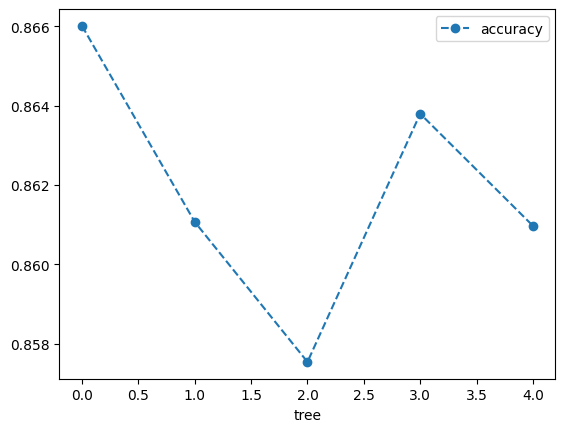

In [801]:
#이게 최적의 alpha인가? 지금 alpha는 train데이터만 갖고 찾은 alpha임으로 optimal alpha를 찾기위해선
#test data / train data 모두를 test해봐야함, using cross validation
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0015)

scores = cross_val_score(clf_dt, x_train, y_train, cv = 5)
df2 = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})

df2.plot(x='tree', y='accuracy', marker='o', linestyle='--')
          

In [802]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, x_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_result = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

# alpha_result.plot(x='alpha', 
#                  y='mean_accuracy',
#                  yerr='std',
#                  marker='o',
#                  linestyle='--')
# plt.show()



In [803]:
 alpha_result[alpha_result == alpha_result['mean_accuracy'].max()].sort_values(by='mean_accuracy', ascending=False)


,alpha,mean_accuracy,std
351,NaN,0.864842,NaN
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
...,...,...,...
359,NaN,NaN,NaN
360,NaN,NaN,NaN
361,NaN,NaN,NaN
362,NaN,NaN,NaN


In [804]:
ideal_ccp_alpha=alpha_result['alpha'][351:352]

In [805]:
ideal_ccp_alpha = float(ideal_ccp_alpha)

In [806]:
#Build and train a new decisiontree
#빈껍데기
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
#학습
clf_pruned.fit(x_train, y_train)
#예측
y_pred_train = clf_pruned.predict(x_train)
y_pred_test = clf_pruned.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

                   precision    recall  f1-score   support

Attrited Customer       0.74      0.25      0.38      1131
Existing Customer       0.87      0.98      0.93      5957

         accuracy                           0.87      7088
        macro avg       0.81      0.62      0.65      7088
     weighted avg       0.85      0.87      0.84      7088

                   precision    recall  f1-score   support

Attrited Customer       0.67      0.22      0.33       496
Existing Customer       0.87      0.98      0.92      2543

         accuracy                           0.85      3039
        macro avg       0.77      0.60      0.63      3039
     weighted avg       0.83      0.85      0.82      3039



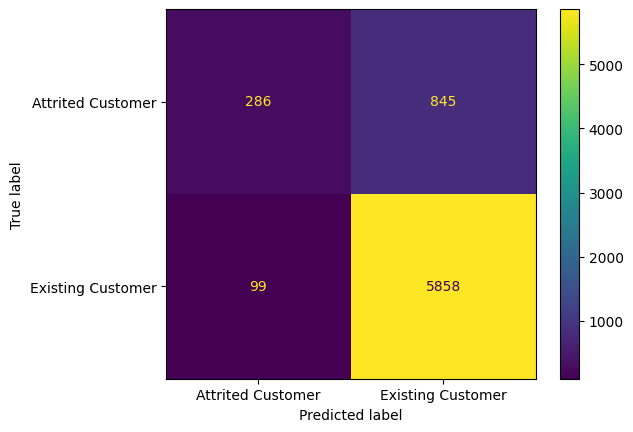

In [807]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred_train, labels=clf_pruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = clf_pruned.classes_)

disp.plot()
plt.show()

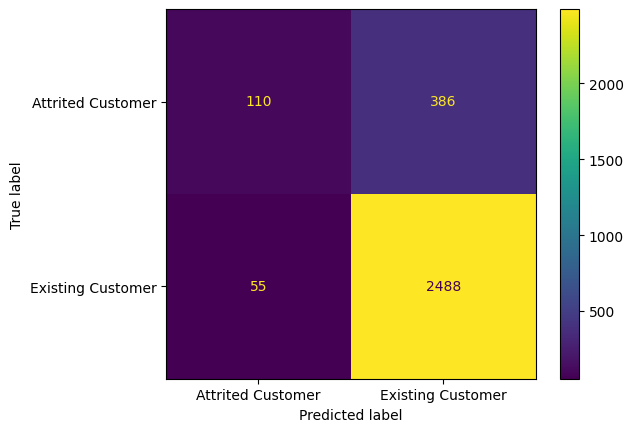

In [808]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test, labels=clf_pruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = clf_pruned.classes_)

disp.plot()
plt.show()

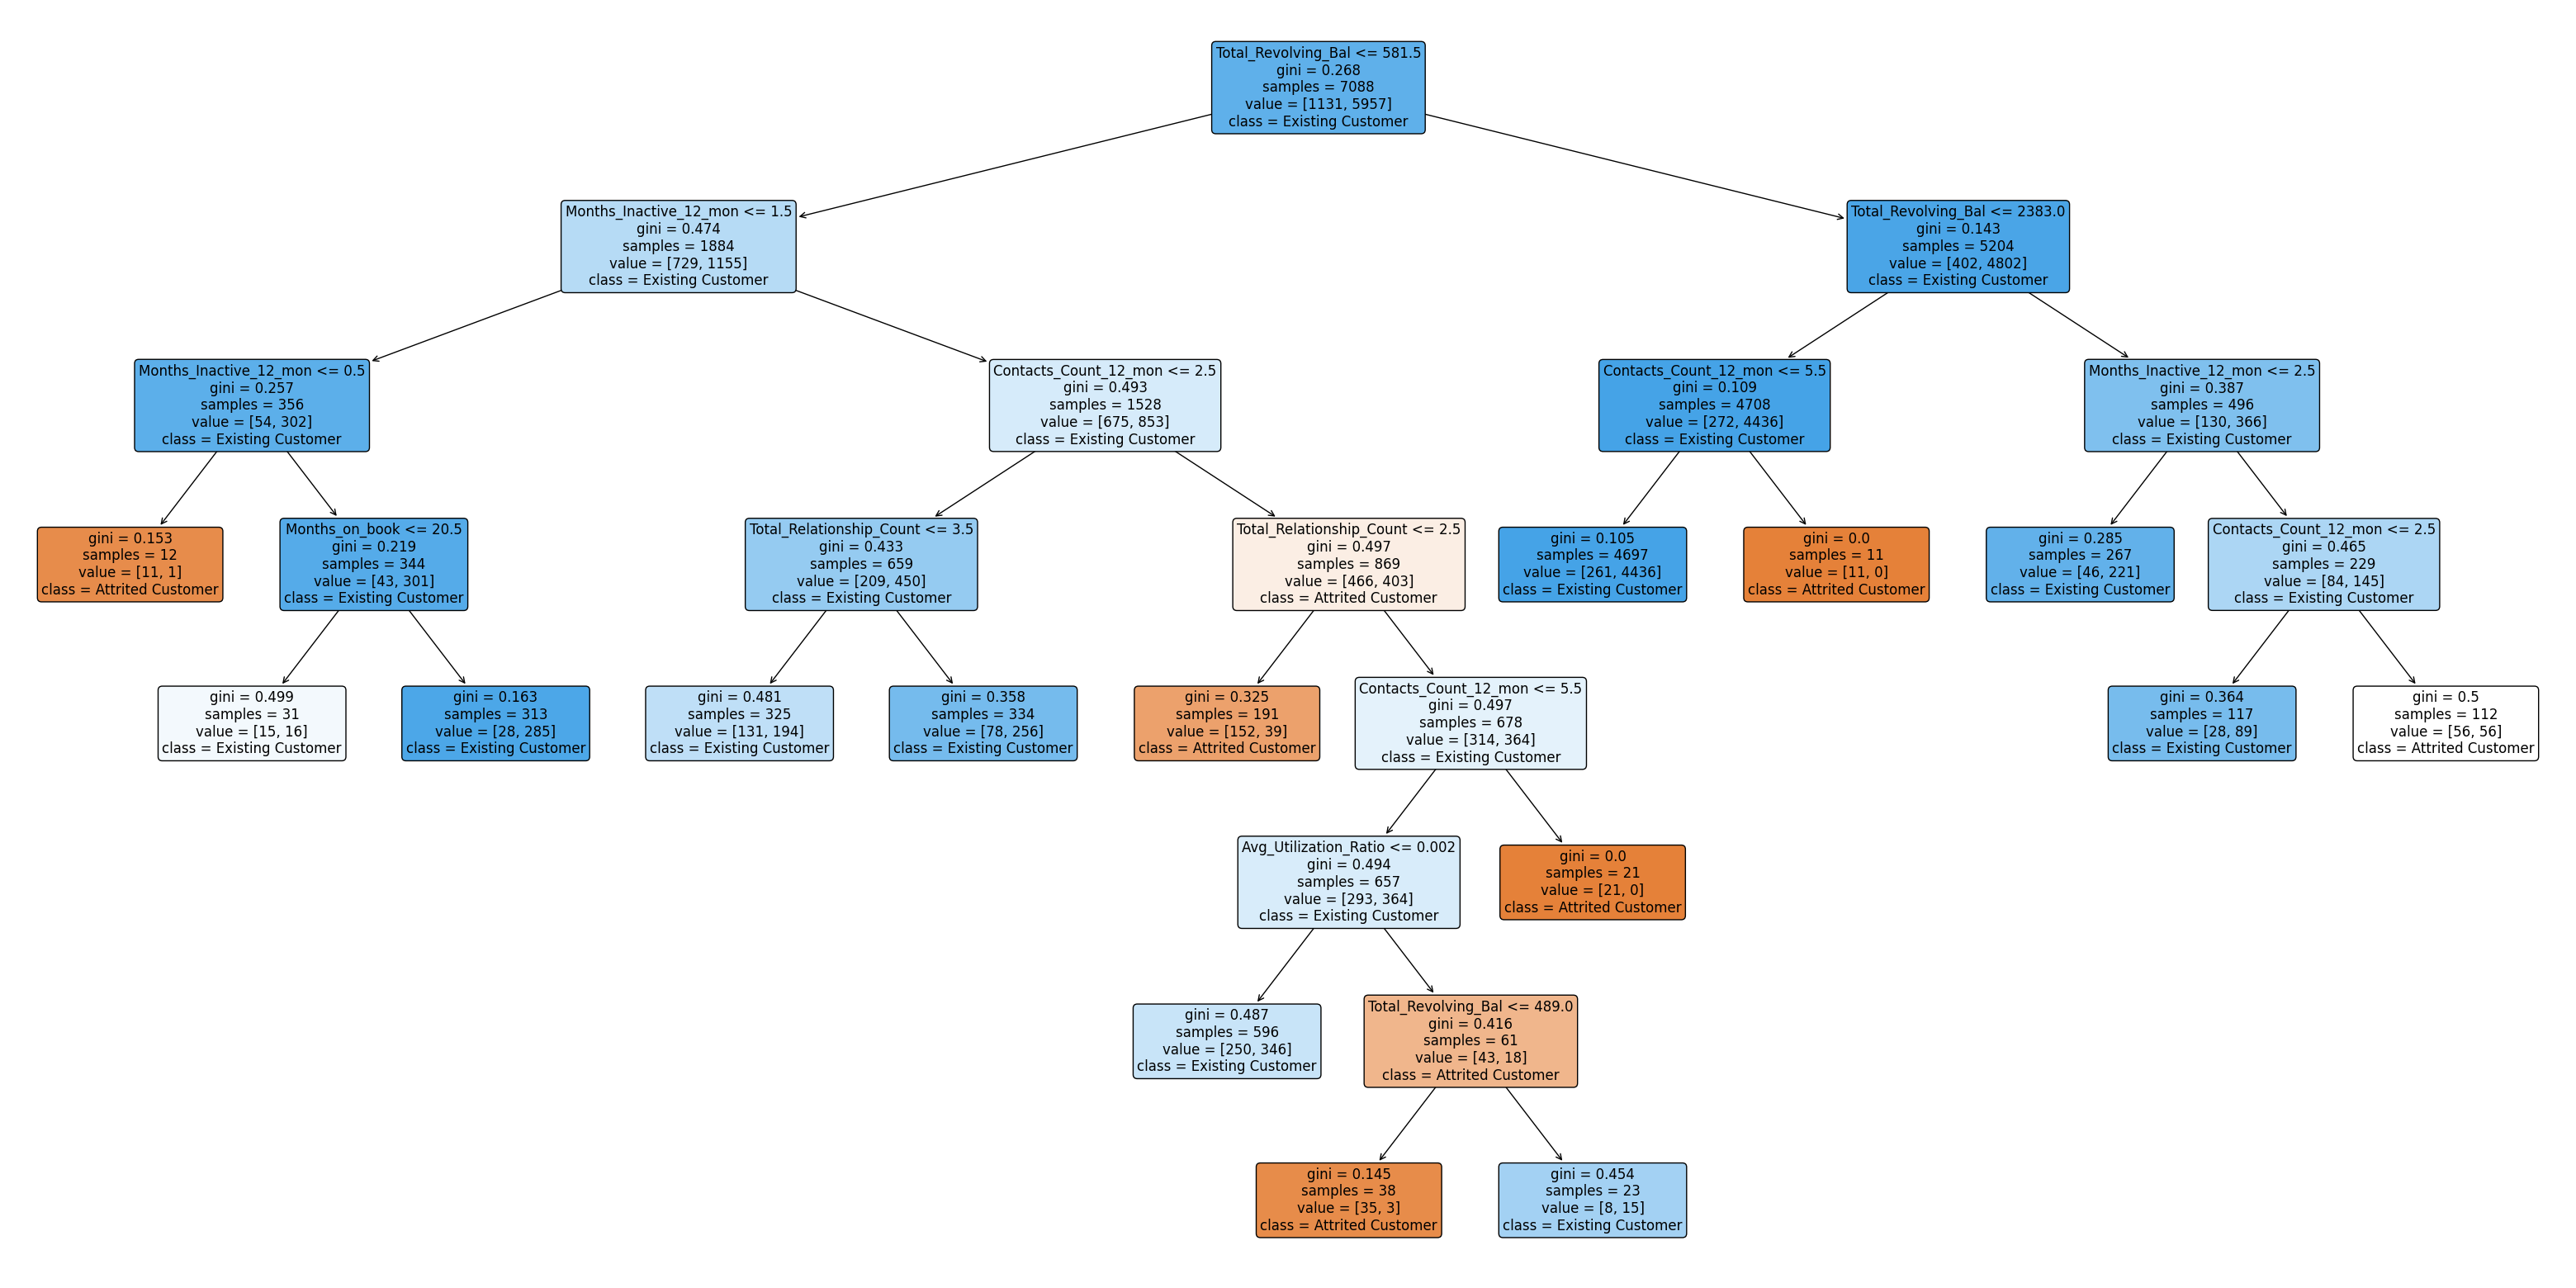

In [809]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20), dpi=100)
plot_tree(clf_pruned, filled=True, rounded=True, class_names=['Attrited Customer', 'Existing Customer'],
          feature_names = X.columns, fontsize=12)

plt.show()

Gini 불순도가 낮을수록 데이터 포인트가 한쪽 클래스에 집중되어 있고 잘 분류될 가능성이 높음을 의미하며, Gini 불순도가 높을수록 데이터 포인트가 여러 클래스에 분포되어 있고 잘못 분류될 가능성이 높음을 의미합니다.


나눔포인트
---


In [810]:
#Accuracy는 높으나 Recall이 낮으니 새로운 방법을 시도해보자 - GridsearchCV(격자검색)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score

clf = DecisionTreeClassifier(random_state = 42)

# Define parameters for GridSearch
param_grid = {
    'ccp_alpha': [0.0005, 0.001, 0.0015, 0.0002],
    'max_depth': [2, 3, 4, 5, 6]
}

# Custom scorer that uses F1 score
scorer = make_scorer(f1_score, average='weighted')

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(x_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

print(best_params, best_model)

                   precision    recall  f1-score   support

Attrited Customer       0.80      0.27      0.40      1131
Existing Customer       0.88      0.99      0.93      5957

         accuracy                           0.87      7088
        macro avg       0.84      0.63      0.67      7088
     weighted avg       0.86      0.87      0.84      7088

                   precision    recall  f1-score   support

Attrited Customer       0.73      0.24      0.36       496
Existing Customer       0.87      0.98      0.92      2543

         accuracy                           0.86      3039
        macro avg       0.80      0.61      0.64      3039
     weighted avg       0.85      0.86      0.83      3039

{'ccp_alpha': 0.0002, 'max_depth': 6} DecisionTreeClassifier(ccp_alpha=0.0002, max_depth=6, random_state=42)


In [811]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameters to tune
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0005, 0.002)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    # Create the model with suggested hyperparameters
    model = DecisionTreeClassifier(
        random_state=42,
        ccp_alpha=ccp_alpha,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    
    # Custom scorer that uses F1 score
    scorer = make_scorer(f1_score, average='weighted')
    
    # Perform cross-validation
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring=scorer)
    
    # Return the average F1 score
    return scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params

# Train the best model on the entire training data
best_model = DecisionTreeClassifier(
    random_state=42,
    **best_params
)
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

# Check best parameters
print("Best parameters found: ", best_params)

[I 2024-07-24 06:25:39,304] A new study created in memory with name: no-name-05fa9ef4-82a7-45ac-9dfa-4370bf8a0cb5
[I 2024-07-24 06:25:39,530] Trial 0 finished with value: 0.7675690111973195 and parameters: {'ccp_alpha': 0.001965258664098863, 'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.7675690111973195.
[I 2024-07-24 06:25:39,771] Trial 1 finished with value: 0.7675690111973195 and parameters: {'ccp_alpha': 0.0008772803032812812, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.7675690111973195.
[I 2024-07-24 06:25:40,109] Trial 2 finished with value: 0.8291513454771764 and parameters: {'ccp_alpha': 0.0005499352307637152, 'max_depth': 8, 'min_samples_split': 19, 'min_samples_leaf': 19}. Best is trial 2 with value: 0.8291513454771764.
[I 2024-07-24 06:25:40,424] Trial 3 finished with value: 0.8208632507147053 and parameters: {'ccp_alpha': 0.0016350637229741558, 'max_depth': 7, 'min_samples_spl

                   precision    recall  f1-score   support

Attrited Customer       0.75      0.26      0.39      1131
Existing Customer       0.87      0.98      0.93      5957

         accuracy                           0.87      7088
        macro avg       0.81      0.62      0.66      7088
     weighted avg       0.85      0.87      0.84      7088

                   precision    recall  f1-score   support

Attrited Customer       0.67      0.23      0.34       496
Existing Customer       0.87      0.98      0.92      2543

         accuracy                           0.86      3039
        macro avg       0.77      0.60      0.63      3039
     weighted avg       0.83      0.86      0.82      3039

Best parameters found:  {'ccp_alpha': 0.0008523147004653457, 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 5}


In [812]:
#Accuracy는 높으나 Recall이 낮으니 새로운 방법을 시도해보자 - RandomizedSearchCV(격자검색)

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score
from scipy.stats import uniform, randint

# Define the model
clf = DecisionTreeClassifier(random_state=42)

# Define distributions for hyperparameters
param_dist = {
    'ccp_alpha': uniform(0.0005, 0.002),  # Uniform distribution for alpha
    'max_depth': randint(1, 6),       # Random integers for max_depth
#     'min_samples_split': randint(2, 10), # Random integers for min_samples_split
#     'min_samples_leaf': randint(1, 10)  # Random integers for min_samples_leaf
}

# Custom scorer that uses F1 score
scorer = make_scorer(f1_score, average='weighted')

# Perform RandomizedSearch with cross-validation
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=100, cv=5, scoring=scorer, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate on the test set
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))
# Check best parameters
print("Best parameters found: ", best_params)


                   precision    recall  f1-score   support

Attrited Customer       0.55      0.43      0.48      1131
Existing Customer       0.90      0.93      0.91      5957

         accuracy                           0.85      7088
        macro avg       0.72      0.68      0.70      7088
     weighted avg       0.84      0.85      0.85      7088

                   precision    recall  f1-score   support

Attrited Customer       0.56      0.41      0.47       496
Existing Customer       0.89      0.94      0.91      2543

         accuracy                           0.85      3039
        macro avg       0.72      0.67      0.69      3039
     weighted avg       0.84      0.85      0.84      3039

Best parameters found:  {'ccp_alpha': 0.0008119890406724053, 'max_depth': 3}


High-Low Modelling
---


In [814]:
df1 = df1.drop(['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'], axis=1)

KeyError: "['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'] not found in axis"

High-Risk, Low-Risk, Risk 별 Decision tree 그리기

In [815]:
df_high = df1[df1['risk_category'] == 'high_risk']
df_high.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,risk_ratio,risk_category
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,0.760,0.759734,high_risk
18,Existing Customer,61,M,1,High School,Married,$40K - $60K,Blue,56,2,2,3,3193.0,2517,0.788,0.788287,high_risk
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,0.626,0.626003,high_risk
30,Existing Customer,53,M,3,Unknown,Married,$80K - $120K,Blue,33,3,2,3,2753.0,1811,0.658,0.657828,high_risk
31,Existing Customer,53,M,2,Uneducated,Married,$60K - $80K,Blue,48,2,5,1,2451.0,1690,0.690,0.689514,high_risk


In [816]:
df_low = df1[df1['risk_category']=='low_risk']
df_low.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,risk_ratio,risk_category
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,0.0,0.0,low_risk
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,0.0,0.0,low_risk
12,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.0,0,0.0,0.0,low_risk
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,0.0,0.0,low_risk
24,Existing Customer,54,M,2,Unknown,Married,$80K - $120K,Blue,42,4,2,3,12217.0,0,0.0,0.0,low_risk


In [817]:
df_medium = df1[df1['risk_category']=='medium_risk']
df_medium.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,risk_ratio,risk_category
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,0.061,0.061224,medium_risk
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,0.105,0.104651,medium_risk
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,0.311,0.310973,medium_risk
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Silver_group,46,6,1,3,34516.0,2264,0.066,0.065593,medium_risk
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver_group,27,2,2,2,29081.0,1396,0.048,0.048004,medium_risk


In [818]:
from sklearn.model_selection import train_test_split

X = df_high.drop(['Attrition_Flag', 'risk_category', 'risk_ratio'], axis =1)
y = df_high['Attrition_Flag']

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_train.shape)

(1785, 14)
(1785,)
(765, 14)
(1785, 14)


In [819]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
    
x_train[categorical_list].head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
2232,0,5,0,5,0
5769,0,4,0,1,0
5699,0,2,0,1,0
5052,0,1,0,4,0
1283,1,2,0,4,0


In [820]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf_high = best_model
clf_high.fit(x_train, y_train)
y_pred_train = clf_high.predict(x_train)
y_pred_test = clf_high.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

                   precision    recall  f1-score   support

Attrited Customer       0.63      0.25      0.36       153
Existing Customer       0.93      0.99      0.96      1632

         accuracy                           0.92      1785
        macro avg       0.78      0.62      0.66      1785
     weighted avg       0.91      0.92      0.91      1785

                   precision    recall  f1-score   support

Attrited Customer       0.45      0.12      0.19        75
Existing Customer       0.91      0.98      0.95       690

         accuracy                           0.90       765
        macro avg       0.68      0.55      0.57       765
     weighted avg       0.87      0.90      0.87       765



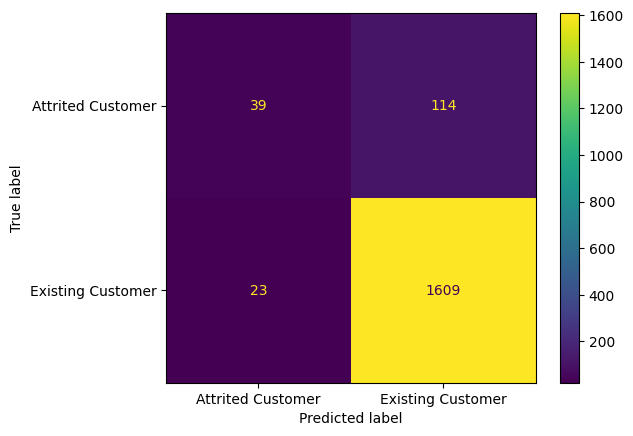

In [821]:
#draw a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred_train, labels=clf_high.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_high.classes_)

disp.plot()
plt.show()

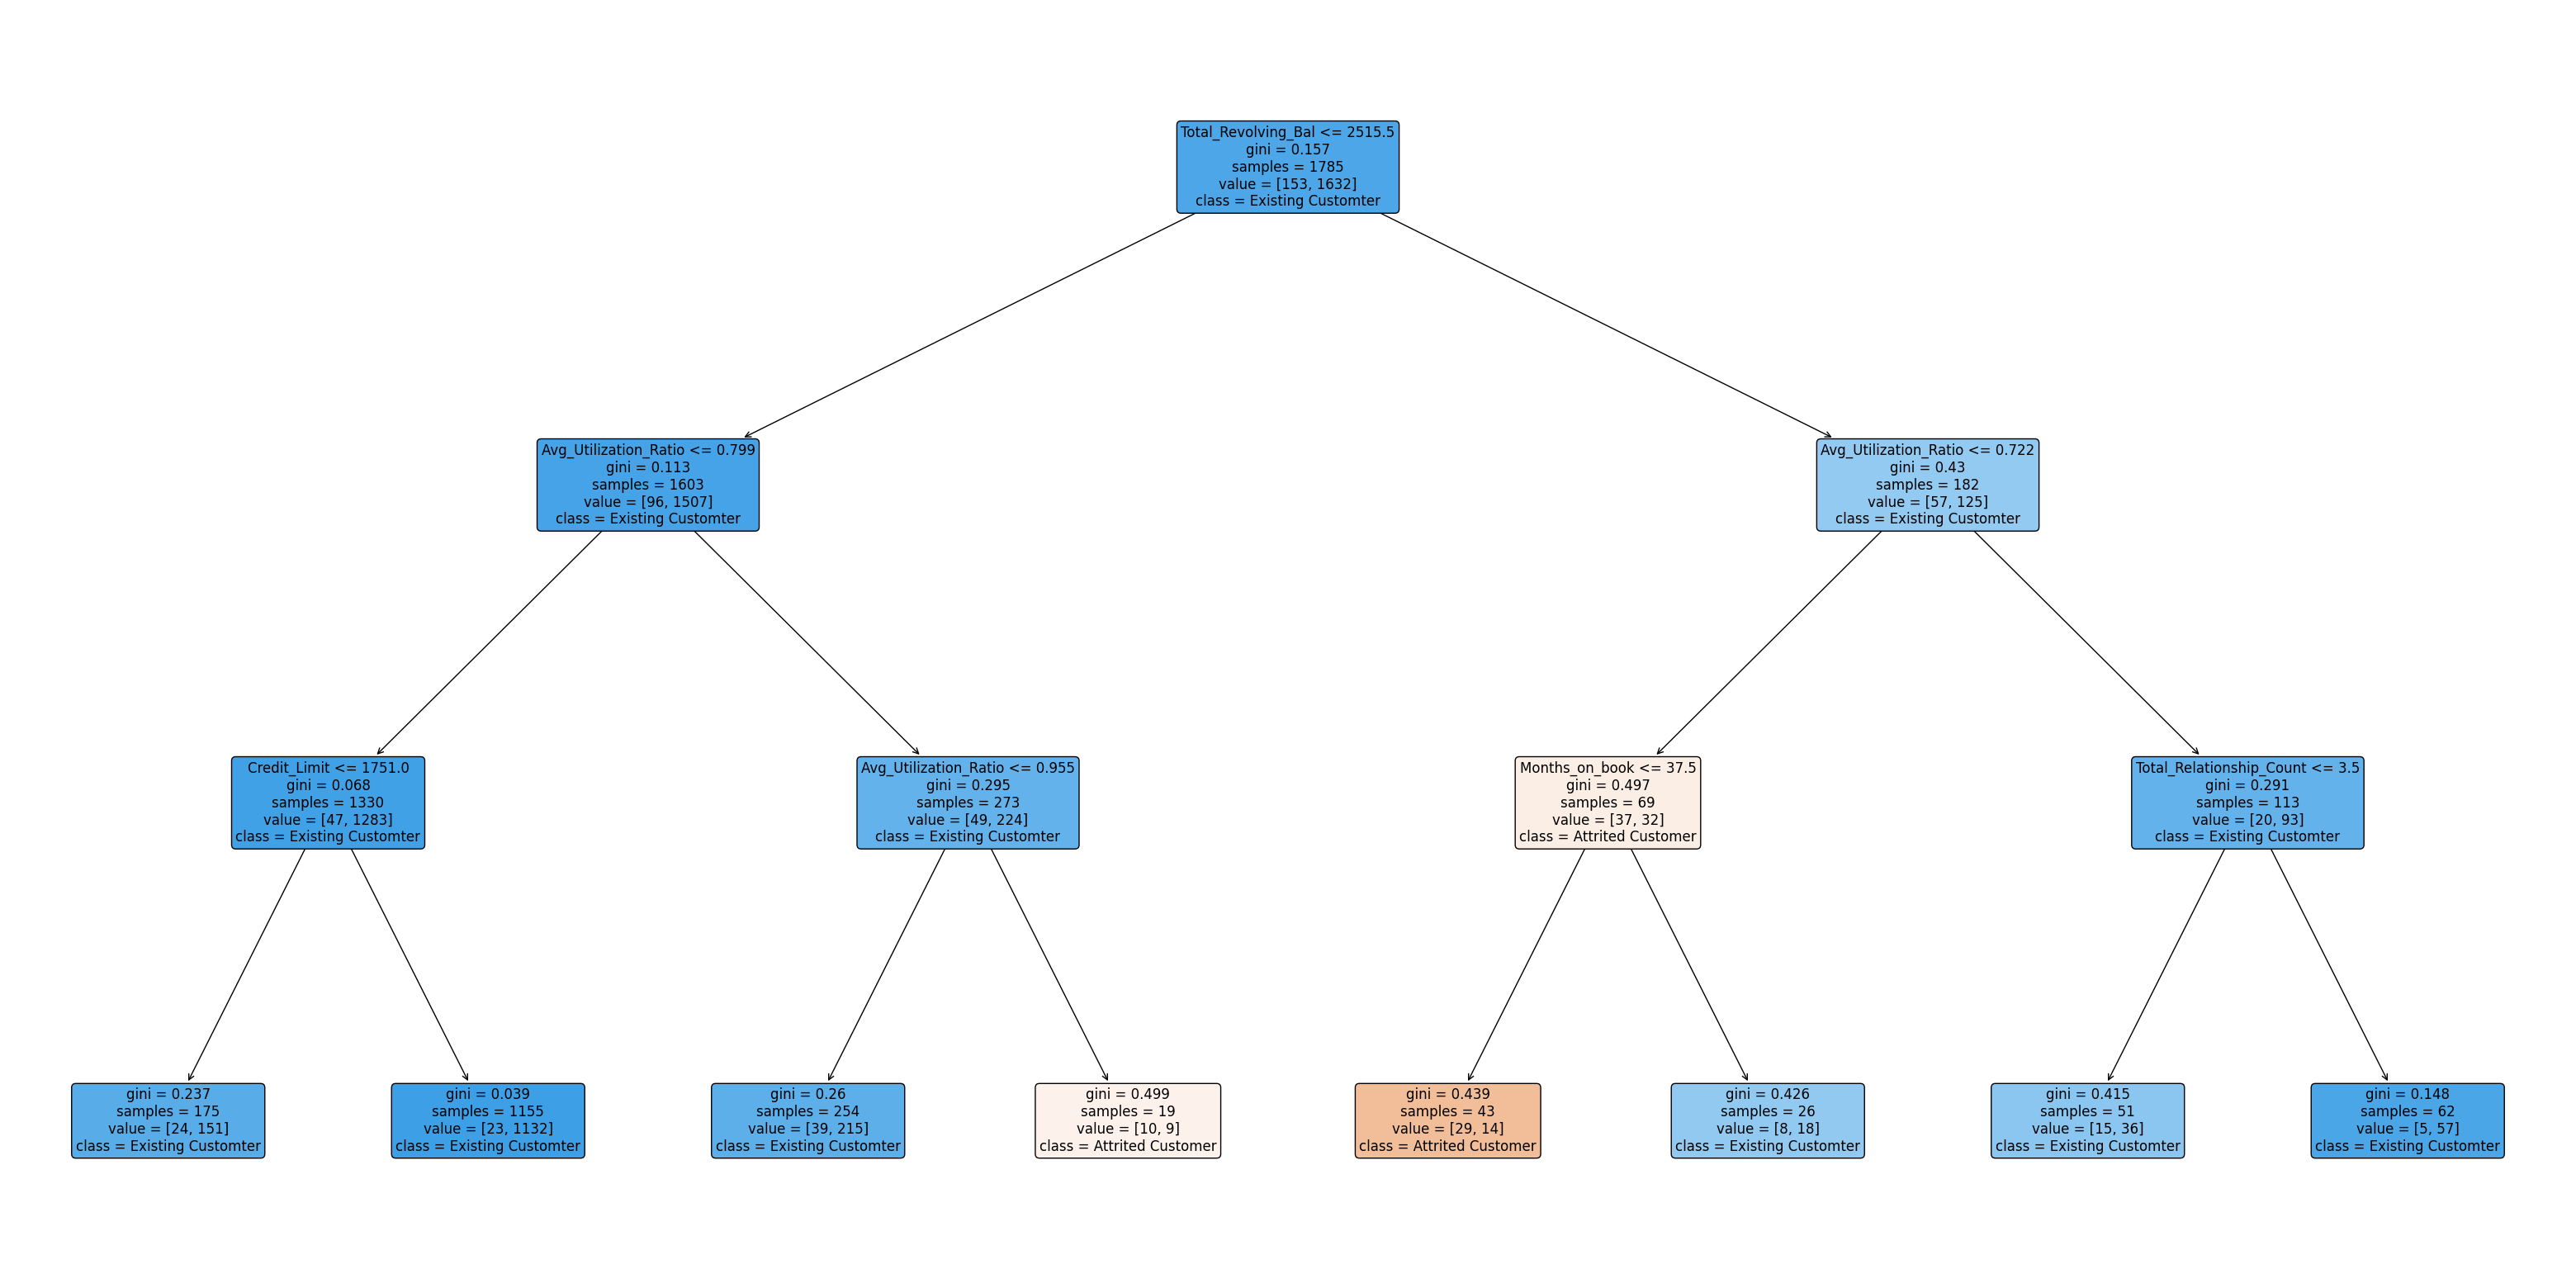

In [822]:
#plot Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20), dpi = 100)

plot_tree(clf_high, filled=True, rounded=True, class_names = ['Attrited Customer', 'Existing Customter'],
        feature_names = X.columns, fontsize=12)
plt.show()

In [824]:
df_high[(df_high['Total_Revolving_Bal'] >= 2515.5) & (df_high['Months_on_book'] <= 37.5) & (df_high['Avg_Utilization_Ratio'] <= 0.722)]['Attrition_Flag'].value_counts()

Attrition_Flag
Attrited Customer    36
Existing Customer    20
Name: count, dtype: int64

In [826]:
#검증 - Low df
df_low[(df_low['Total_Revolving_Bal'] >= 2515.5) & (df_low['Months_on_book'] <= 37.5) & (df_low['Avg_Utilization_Ratio'] <= 0.722)]['Attrition_Flag'].value_counts()

Series([], Name: count, dtype: int64)

In [827]:
#검증 - medium df
df_medium[(df_medium['Total_Revolving_Bal'] >= 2515.5) & (df_medium['Months_on_book'] <= 37.5) & (df_medium['Avg_Utilization_Ratio'] <= 0.722)]['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    117
Attrited Customer     46
Name: count, dtype: int64

In [828]:
from sklearn.model_selection import train_test_split

X = df_low.drop(['Attrition_Flag', 'risk_category'], axis =1)
y = df_low['Attrition_Flag']

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state = 42)

print(x_train.shape)
print(y_train.shape)

(1729, 15)
(1729,)


In [829]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
    
x_train[categorical_list].head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
8928,1,6,1,2,0
2842,1,2,0,1,0
2032,1,2,0,3,0
9150,0,2,0,4,0
6392,1,2,0,1,0


In [831]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf_low = best_model
clf_low.fit(x_train, y_train)
y_pred_train = clf_low.predict(x_train)
y_pred_test = clf_low.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

                   precision    recall  f1-score   support

Attrited Customer       0.69      0.33      0.45       614
Existing Customer       0.71      0.92      0.80      1115

         accuracy                           0.71      1729
        macro avg       0.70      0.62      0.63      1729
     weighted avg       0.71      0.71      0.68      1729

                   precision    recall  f1-score   support

Attrited Customer       0.66      0.29      0.40       279
Existing Customer       0.68      0.91      0.78       462

         accuracy                           0.68       741
        macro avg       0.67      0.60      0.59       741
     weighted avg       0.67      0.68      0.64       741



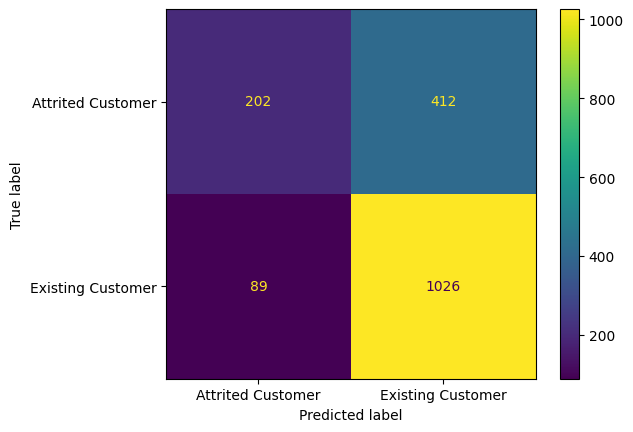

In [833]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred_train, labels=clf_low.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_low.classes_)

disp.plot()
plt.show()

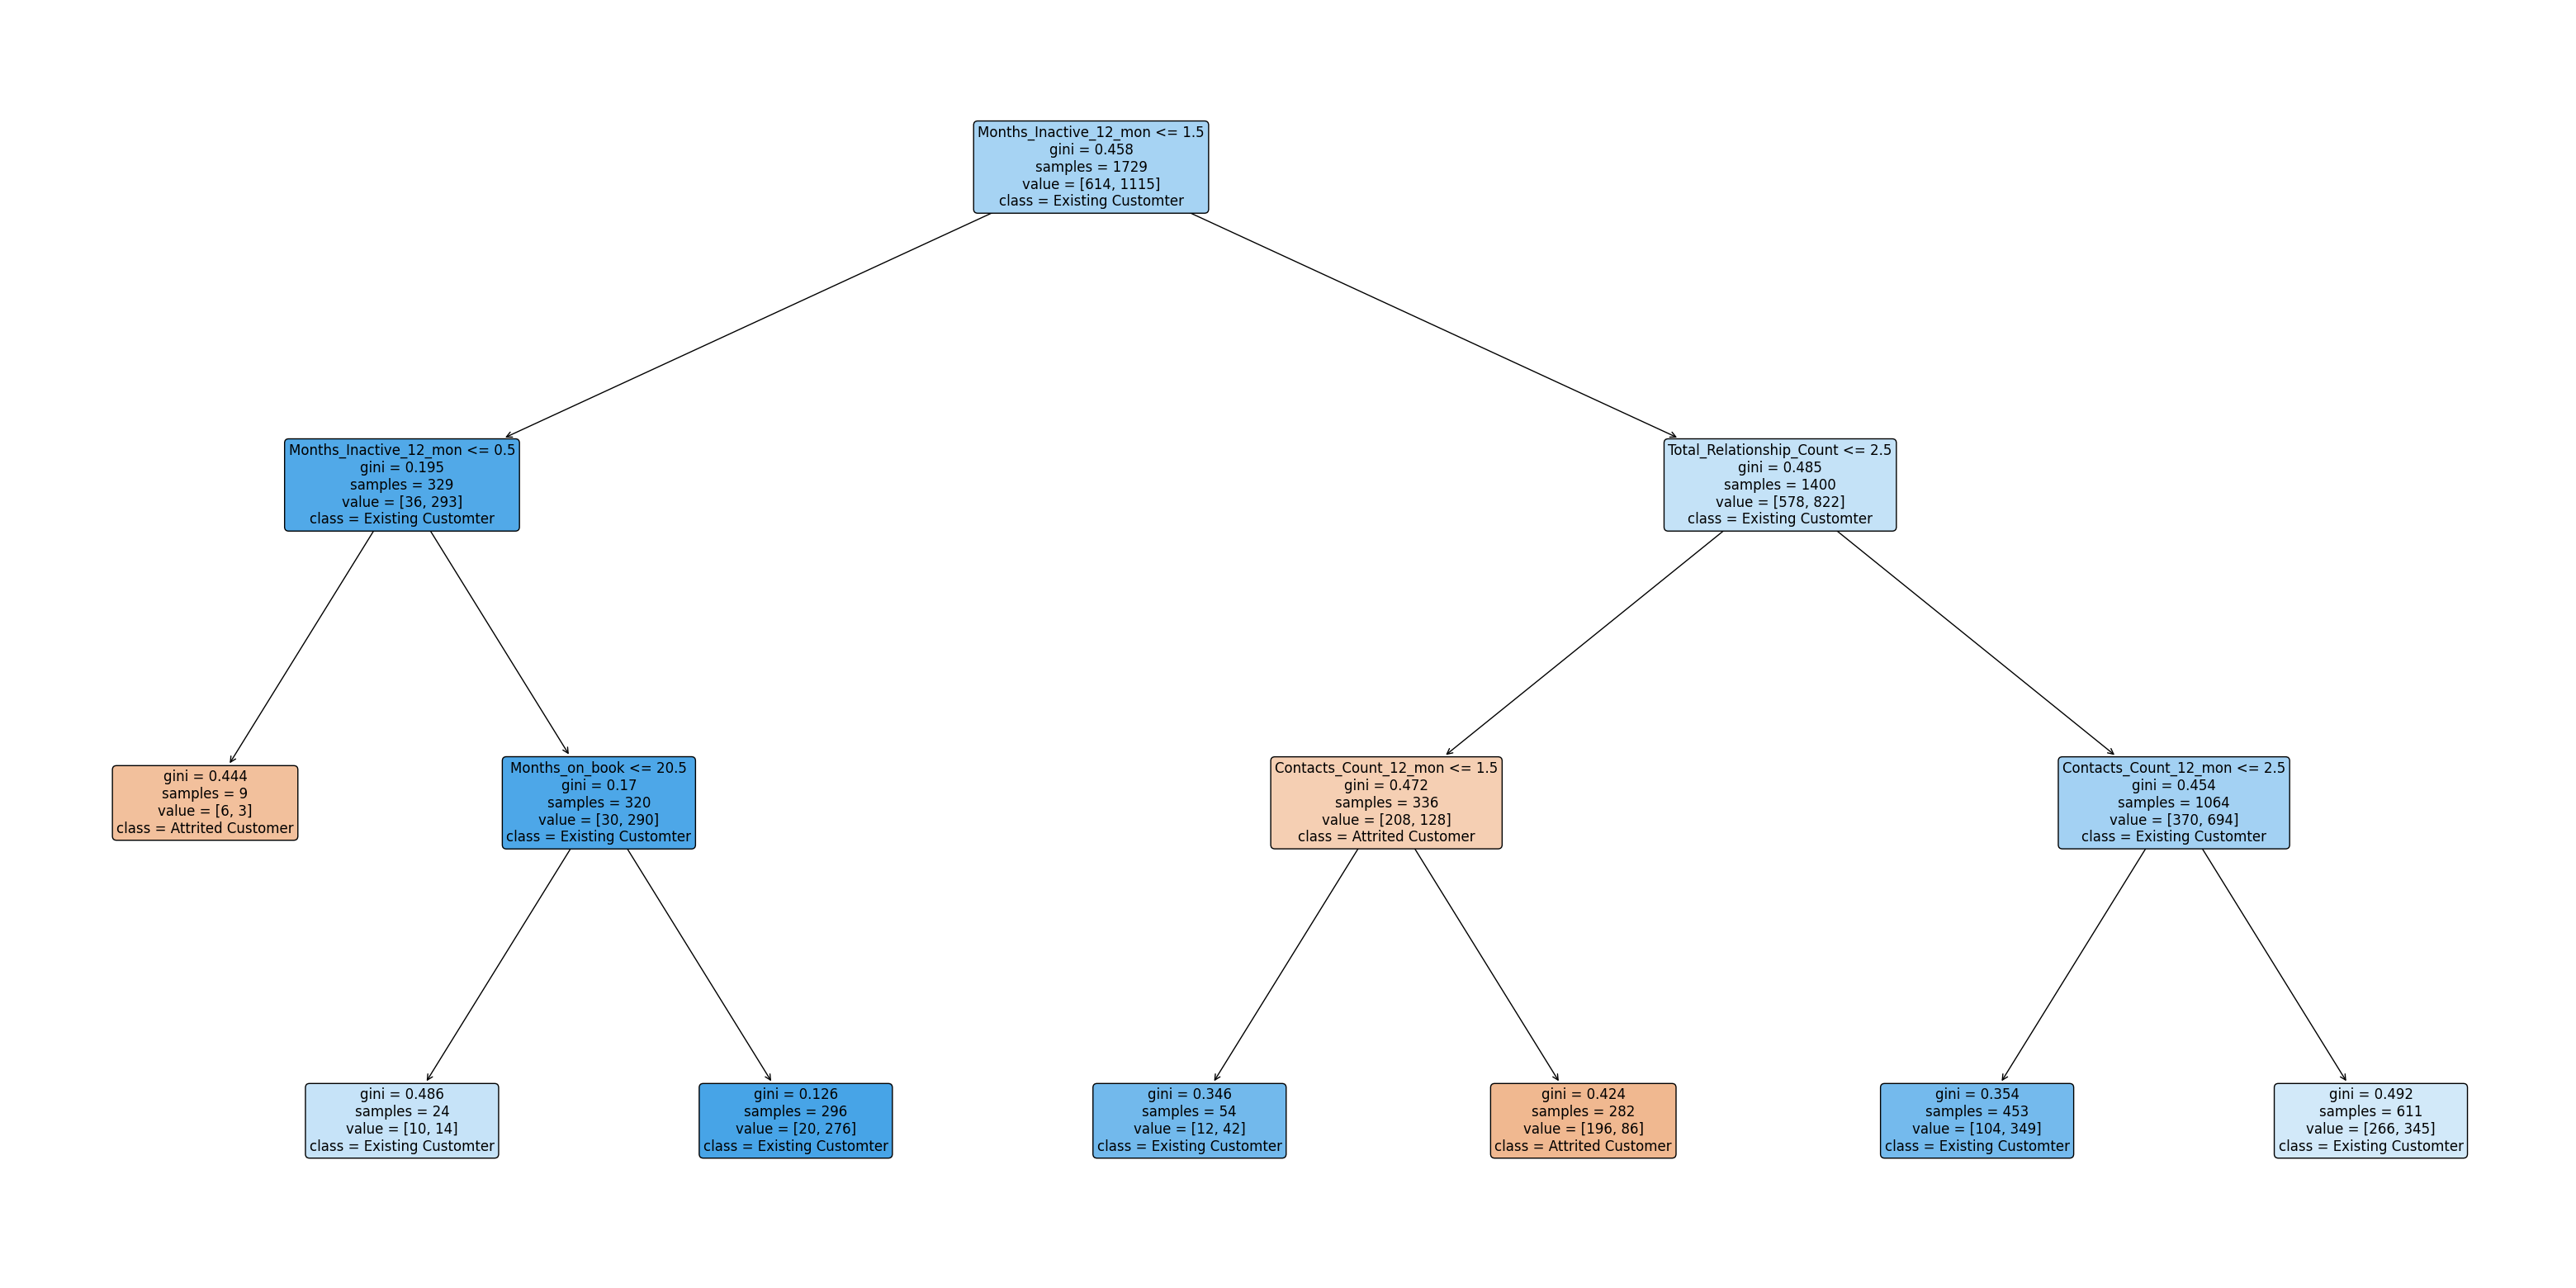

In [834]:
#plot Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20), dpi = 100)

plot_tree(clf_low, filled=True, rounded=True, class_names = ['Attrited Customer', 'Existing Customter'],
        feature_names = X.columns, fontsize=12)
plt.show()

In [837]:
churn = df_low[(df_low['Months_Inactive_12_mon'] >= 1.5) & (df_low['Total_Relationship_Count'] <= 2.5) & (df_low['Attrition_Flag'] == 'Attrited Customer') ]

AVG_Utilization_Ratio = 신용 한도 대비 사용한 한도의 비율
Months_inactive_12_mon = 지난 12개월 동안 고객 계정의 비활성화된 월 수
Total_relationship_count = 고객이 신용카드 회사와 맺고 있는 총 상품 또는 서비스 수
Contract_Counts_12_mon = 최근 12개월간 고객과 회사간 연락 횟수

#Low risk
Attrition client pattern
AVG_Utilization_Ratio <= 0.828
4.5 <= Contract_Count_12_month 

Existing client pattern
AVG_Utilization_Ratio <= 0.828
Contract_Count_12_month >= 4.5
OR
    
AVG_Utilization_Ratio >= 0.828
Months_Inactive_12mon <=1.5

Insight (Low Risk clients)
리스크 낮은 고객들은 장기적으로 가지고 가야 하는 고객군임
이탈한 Low risk 고객 군
-	신용 한도대비 사용한 비율이 적으며 1년에 4.5 컨택을 하면 이탈하는 경향을 보임
이탈하지 않은 Low Risk 고객군
-	신용 한도대비 사용한 비율이 적으며 1년에 4.5번 이하로 컨택을 하면 이탈하지 않는 경향을 보임

마케팅 전략
-	Decision Tree마지막 node를 보니 4.5번 이하로 컨택 할 수 록 고객들이 이탈하지 않는 경향을 보임. 너무 잦은 연락은 이탈율을 높일 수 있으니 4.5번이하 분기에 1번정도 연락을 하며 신용카드 한도 상향을 제한을 한다면 이탈율을 줄이며 고객들을 유지 할 수 있을 듯 함


High-Risk
Attrition client pattern
1.5 <= Months_inactive_12_mon 
Total_Relationship_Count  <= 2.5
2.5 <=  Contacts_Count_12_mon  <=5.5

Existing client pattern
Months_inactive_12_mon >= 1.5
Or
1.5 <= Months_inactive_12_mon 
2.5 <= Total_Relationship_Count  
Contacts_Count_12_mon  <= 2.5

Insight (High Risk clients)
리스크 높은 고객들은 회사의 실적을 향상시키기 위해 특별히 관리해야 하는 고객군임
이탈한 High risk 고객 군
-	High리스크 고객들 중 이탈한 고객들은1.5달 이상 카드를 사용하지 않으며 고객들이 신용카드 회사와 맺고 있는 상품의 수가 2.5개 이하인 경우가 많았음
-	High리스크 고객들중 이탈하지 않은 고객들은 1.5 개월을 제외한 모든달에 카드 사용 기록이 있고,  2.5개 이상의 상품을 카드사와  맺고 있으며, 2.5번 이하로 연락하는 것을 선호했다
마케팅 전략
-	High Risk고객들은 고객들이 신용카드 회사와 맺고 있는 상품 또는 서비스 수를 높고 매달 신용카드를 소비 할 수 있도록 하는 프로모션을 진행하면 이탈율을 줄일 수 있을 것 같음


In [843]:
from sklearn.model_selection import train_test_split

X = df_medium.drop(['Attrition_Flag', 'risk_category'], axis =1)
y = df_medium['Attrition_Flag']

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state = 42)

print(x_train.shape)
print(y_train.shape)

(3574, 15)
(3574,)


In [844]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
    
x_train[categorical_list].head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
1382,1,2,0,2,0
6906,0,3,0,1,0
3479,0,2,2,5,0
341,1,5,0,2,0
487,1,2,0,3,0


In [845]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf_medium = best_model
clf_medium.fit(x_train, y_train)
y_pred_train = clf_medium.predict(x_train)
y_pred_test = clf_medium.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

                   precision    recall  f1-score   support

Attrited Customer       0.80      0.28      0.41       355
Existing Customer       0.93      0.99      0.96      3219

         accuracy                           0.92      3574
        macro avg       0.86      0.63      0.68      3574
     weighted avg       0.91      0.92      0.90      3574

                   precision    recall  f1-score   support

Attrited Customer       0.82      0.24      0.37       151
Existing Customer       0.92      0.99      0.96      1382

         accuracy                           0.92      1533
        macro avg       0.87      0.62      0.66      1533
     weighted avg       0.91      0.92      0.90      1533



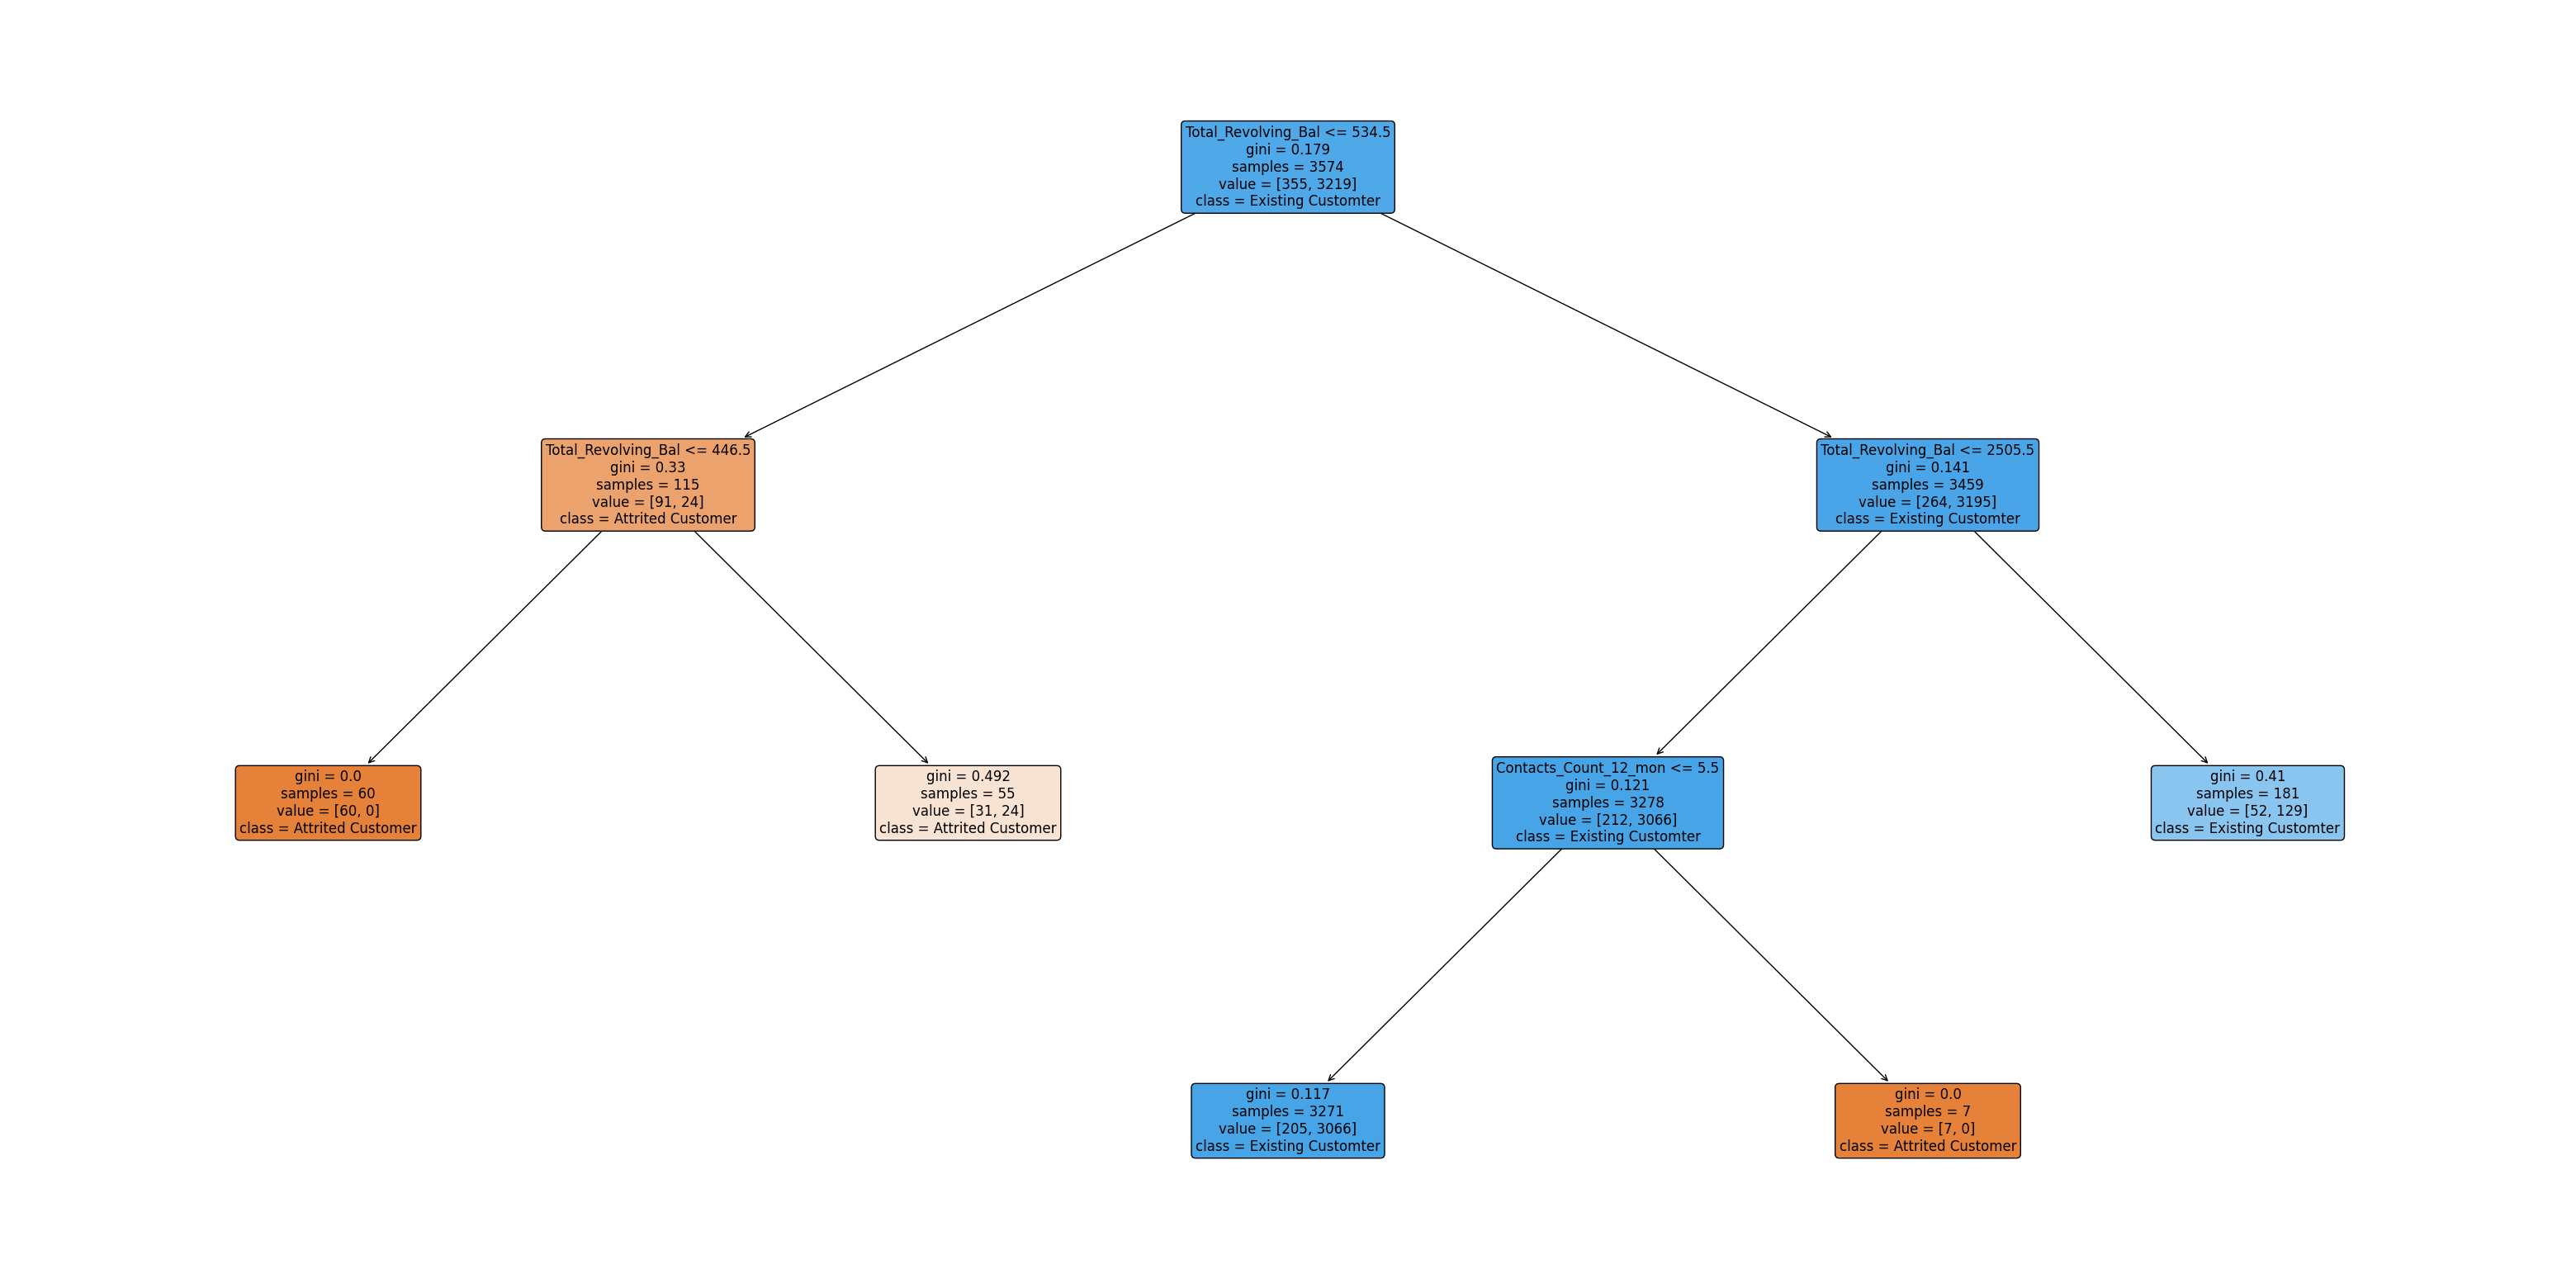

In [846]:
#plot Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20), dpi = 100)

plot_tree(clf_medium, filled=True, rounded=True, class_names = ['Attrited Customer', 'Existing Customter'],
        feature_names = X.columns, fontsize=12)
plt.show()

In [ ]:
# # class 1만 계산
# from sklearn.tree import export_text

# # 지니 인덱스 계산 함수
# def calculate_gini(node_samples):
#     total_samples = sum(node_samples)
#     gini = 1.0 - sum((count / total_samples) ** 2 for count in node_samples)
#     return gini

# # 각 노드의 지니 인덱스와 샘플 수 계산
# n_nodes = best_model.tree_.node_count
# children_left = best_model.tree_.children_left
# children_right = best_model.tree_.children_right
# value = best_model.tree_.value

# node_info = []
# for i in range(n_nodes):
#     samples = value[i][0]
#     gini = calculate_gini(samples)
#     sample_count = int(sum(samples))
#     node_info.append((i, gini, sample_count, children_left[i], children_right[i]))

# # 노드 정보를 깊이 우선 탐색(DFS)으로 매핑
# def get_node_info_dfs(node_index, depth=0):
#     if node_index == -1:
#         return []
#     node_info_list = [(node_index, node_info[node_index][1], node_info[node_index][2], depth)]
#     left_info = get_node_info_dfs(children_left[node_index], depth + 1)
#     right_info = get_node_info_dfs(children_right[node_index], depth + 1)
#     return node_info_list + left_info + right_info

# mapped_node_info = get_node_info_dfs(0)

# # 결정 트리 조건식 출력과 단말 노드의 지니 인덱스 및 노드 번호 표시
# feature_names = list(x_train.columns)
# tree_rules = export_text(best_model, feature_names=feature_names)

# lines = tree_rules.split('\n')
# output_lines = []
# mapped_node_counter = 0
# class_1_nodes = []

# for line in lines:
#     if 'class:' in line:
#         while mapped_node_counter < len(mapped_node_info):
#             node_index, gini, sample_count, depth = mapped_node_info[mapped_node_counter]
#             mapped_node_counter += 1
#             if children_left[node_index] == children_right[node_index]:
#                 break
#         output_lines.append(f"{line} (단말 노드 {node_index}: 지니 인덱스 = {gini:.4f}, 샘플 수 = {sample_count})")
#         if 'class: 1' in line:
#             class_1_nodes.append((node_index, gini, sample_count))
#     else:
#         output_lines.append(line)

# print("\n결정트리 조건식 (단말 노드 번호 및 지니 인덱스 포함):\n")
# for line in output_lines:
#     print(line)

# # 'class: 1'인 단말 노드의 지니 인덱스와 샘플 수 출력
# print("\n'class: 1'인 단말 노드의 지니 인덱스와 샘플 수:")
# for node_index, gini, sample_count in class_1_nodes:
#     print(f"단말 노드 {node_index}: 지니 인덱스 = {gini:.4f}, 샘플 수 = {sample_count}")